In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!pip install contractions

     |████████████████████████████████| 317kB 3.9MB/s 
     |████████████████████████████████| 245kB 8.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81707 sha256=caf1cd3594b1cd5a969185076e70ed06d185f5248e21c598c57094f0ba0fb5e6
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import nltk
import re
import contractions

In [0]:
df = pd.read_excel('/content/drive/My Drive/Capstone Project/Input_Data_Final.xlsx')

In [0]:
df.to_csv('/content/drive/My Drive/Capstone Project/Input_Data_Final.csv')

In [0]:
df = pd.read_csv('/content/drive/My Drive/Capstone Project/Input_Data_Final.csv',encoding='latin-1')
df.drop('Unnamed: 0',inplace=True,axis=1)

In [7]:
df.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English


In [8]:
print(df.shape)
print(df.size)
print(df.info())

(8500, 7)
59500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 7 columns):
Short description        8492 non-null object
Description              8499 non-null object
Caller                   8500 non-null object
Assignment group         8500 non-null object
Cat_Short_Description    8500 non-null object
Cat_Description          8500 non-null object
Final Category           8500 non-null object
dtypes: object(7)
memory usage: 465.0+ KB
None


Inference: Dataset contains total 8500 rows, attributes 'Short description' and 'Description' contains null values. Dataset contains total 7 coumns. 

In [9]:
print(len(df['Short description']))
print(len(set(df['Short description'])))
len(df['Short description'].unique())

8500
7482


7482

In [10]:
print(len(df['Description']))
print(len(set(df['Description'])))
len(df['Description'].unique())

8500
7818


7818

In [11]:
print(len(df['Caller']))
print(len(set(df['Caller'])))
len(df['Caller'].unique())

8500
2950


2950

In [12]:
unique_group = df['Assignment group'].unique()
print(unique_group)

['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37' 'GRP_38' 'GRP_39' 'GRP_40' 'GRP_41'
 'GRP_42' 'GRP_43' 'GRP_44' 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49'
 'GRP_50' 'GRP_51' 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57'
 'GRP_58' 'GRP_59' 'GRP_60' 'GRP_61' 'GRP_32' 'GRP_62' 'GRP_63' 'GRP_64'
 'GRP_65' 'GRP_66' 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_70' 'GRP_71' 'GRP_72'
 'GRP_73']


In [13]:
unique_group = pd.DataFrame(unique_group)
unique_group.count()

0    74
dtype: int64

In [14]:
unique_group = df['Final Category'].unique()
print(unique_group)

['English' 'German' 'Special Char' 'Spanish']


Inference: There are total 
74 unique groups,
2950 unique callers and 
4 unique languages into dataset.

In [0]:
null_value = (df.isna().sum()/df.count().round(2))*100

Text(0.5, 0, 'Table Features')

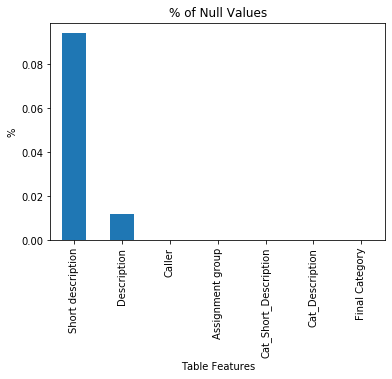

In [16]:
null_value.plot(kind='bar')
plt.title('% of Null Values')
plt.ylabel('%')
plt.xlabel('Table Features')

Inference: There are less than 0.8% of null values into dataset. 

In [0]:
group_freq = df.groupby(df['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
group_freq = pd.DataFrame(group_freq)

In [18]:
group_freq

,Assignment group
Assignment group,
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
...,...
GRP_67,1
GRP_61,1
GRP_73,1


In [0]:
group_freq["cumpercentage"] = group_freq["Assignment group"].cumsum()/group_freq["Assignment group"].sum()*100

In [0]:
from matplotlib.ticker import PercentFormatter

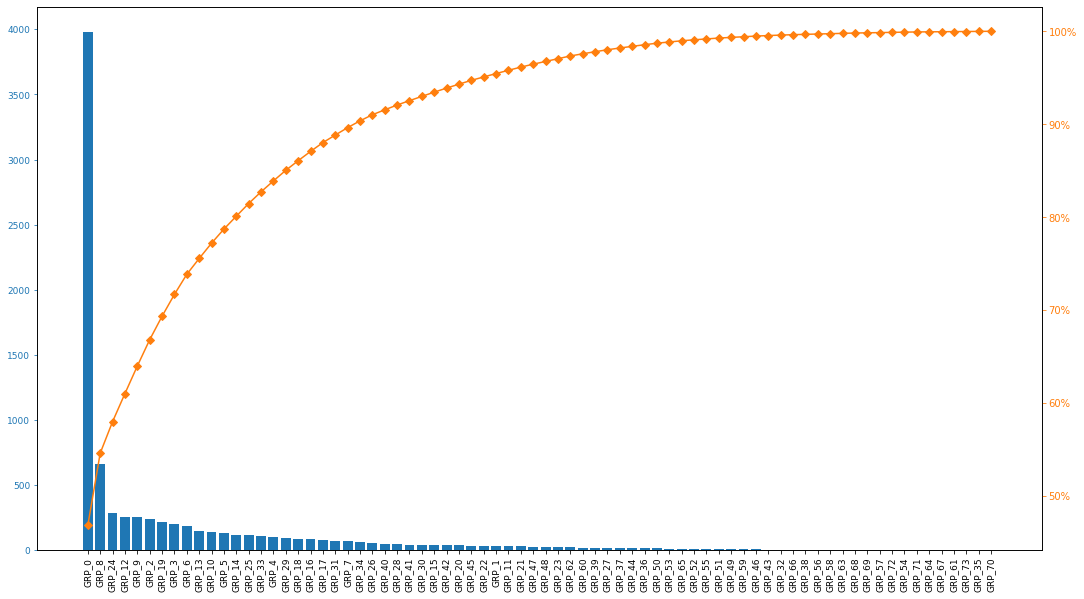

In [21]:
fig, ax = plt.subplots(figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(group_freq.index, group_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(group_freq.index, group_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [0]:
group_freq_lang = df.groupby(df['Final Category'])['Final Category'].count().sort_values(ascending=False)
group_freq_lang = pd.DataFrame(group_freq_lang)

In [23]:
group_freq_lang

,Final Category
Final Category,
English,7985
German,451
Special Char,53
Spanish,11


In [37]:
group_cat_freq_lang = df.groupby(df['Cat_Short_Description'])['Cat_Short_Description'].count().sort_values(ascending=False)
group_cat_freq_lang = pd.DataFrame(group_freq_lang)
group_cat_freq_lang

,Cat_Short_Description
Cat_Short_Description,
English,8019
German,415
Special Char,53
Spanish,12
Null,1


In [38]:
group_cat_desc = df.groupby(df['Cat_Description'])['Cat_Description'].count().sort_values(ascending=False)
group_cat_desc = pd.DataFrame(group_freq_lang)
group_cat_desc

,Cat_Short_Description
Cat_Short_Description,
English,8019
German,415
Special Char,53
Spanish,12
Null,1


In [0]:
group_freq_lang["cumpercentage"] = group_freq_lang["Final Category"].cumsum()/group_freq_lang["Final Category"].sum()*100

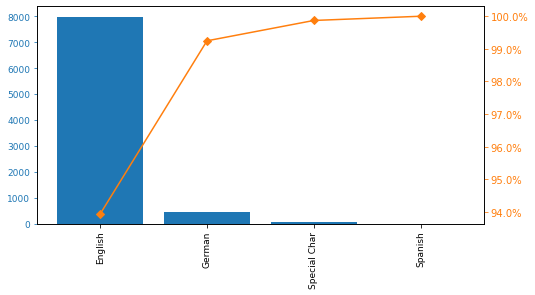

In [25]:
fig, ax = plt.subplots(figsize=(8,4))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(group_freq_lang.index, group_freq_lang["Final Category"], color="C0")
ax2 = ax.twinx()
ax2.plot(group_freq_lang.index, group_freq_lang["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [26]:
a = df['Caller'].unique()
a = pd.DataFrame(a)
a.count()

0    2950
dtype: int64

In [0]:
caller_freq = df.groupby(df['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)

In [28]:
caller_freq.head(2000)

,Caller,cumpercentage
Caller,,
bpctwhsn kzqsbmtp,810,9.53
ZkBogxib QsEJzdZO,151,11.31
fumkcsji sarmtlhy,134,12.88
rbozivdq gmlhrtvp,87,13.91
rkupnshb gsmzfojw,71,14.74
...,...,...
dcsaiweo qvstjlem,1,88.78
xwyrvcbj bmqfszjg,1,88.79
xwlcqfsr lbcqfnie,1,88.80


Bi-Variate Analysis

In [0]:
grp_lang = pd.crosstab(df['Assignment group'],df['Final Category'],normalize='index').round(5)*100


In [30]:
grp_lang

Final Category,English,German,Spanish,Special Char
Assignment group,,,,
GRP_0,97.309,2.666,0.025,0.000
GRP_1,100.000,0.000,0.000,0.000
GRP_10,97.143,2.857,0.000,0.000
GRP_11,96.667,3.333,0.000,0.000
GRP_12,89.883,9.728,0.000,0.389
...,...,...,...,...
GRP_71,100.000,0.000,0.000,0.000
GRP_72,100.000,0.000,0.000,0.000
GRP_73,100.000,0.000,0.000,0.000


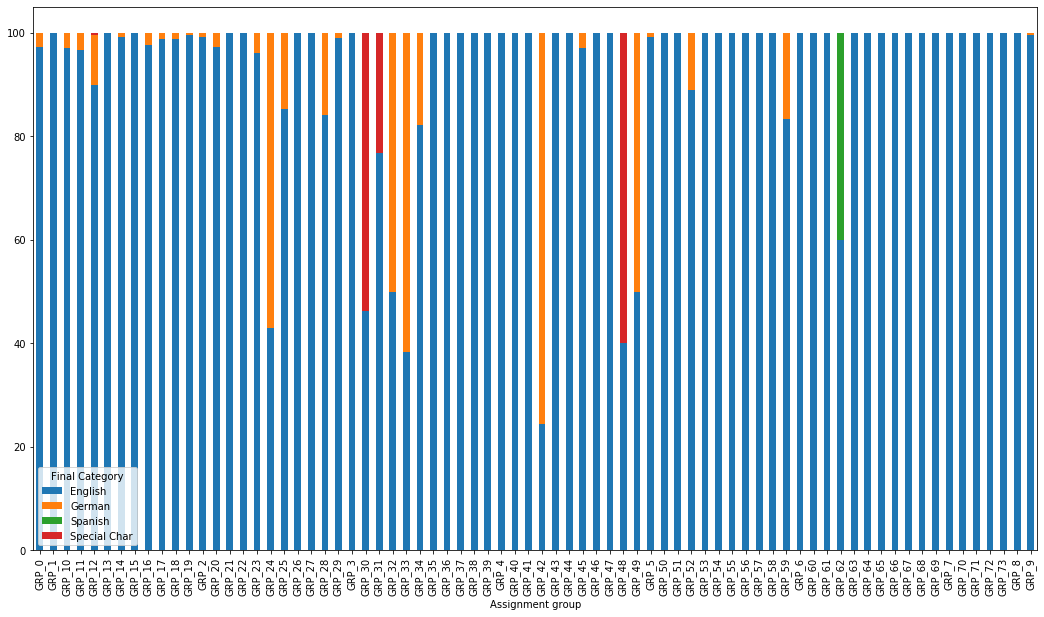

In [31]:
grp_lang.plot(kind='bar',stacked='True',figsize=(18,10))

In [0]:
group_freq["%_contri"] = group_freq["Assignment group"]/group_freq["Assignment group"].sum()*100

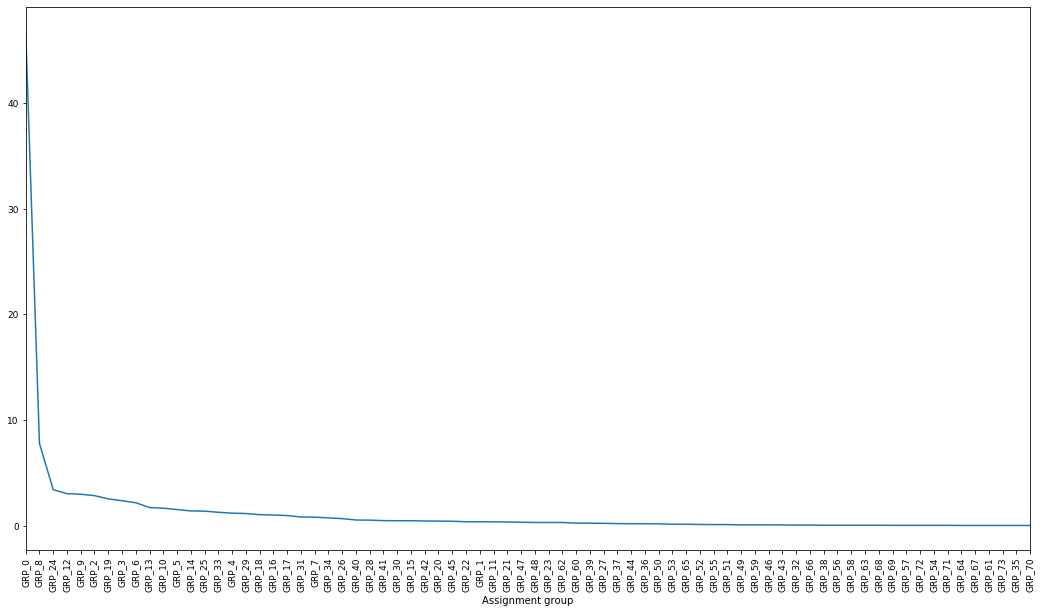

In [33]:
plt.xticks(range(0, 74))
group_freq["%_contri"].plot(kind='line',figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)

In [34]:
caller_grp = pd.crosstab(df['Final Category']=='German',df['Caller'])
caller_grp.T

Final Category,False,True
Caller,,
DEsowkrH sciejzNE,2,0
HdOuWxAt qfKdlJMx,1,0
ZkBogxib QsEJzdZO,151,0
abiuclvj brziktno,1,0
abtknpew ifcekjdb,1,0
...,...,...
zylaexnv pvkzbduh,3,0
zylwdbig wdkbztjp,1,0
zymdwqsi jzvbthil,1,0


In [0]:
a = df[df['Final Category']== 'German']

In [64]:
caller_freq = a.groupby(a['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
jionmpsf wnkpzcmv,16,3.55
vzqomdgt jwoqbuml,12,6.21
niptbwdq csenjruz,12,8.87
wrcktgbd wzrgyunp,8,10.64
xwirzvda okhyipgr,6,11.97
...,...,...
plfwoagd chtpiazu,1,99.11
pjrcbhln qznblemc,1,99.33
phedsjct lyphanue,1,99.56


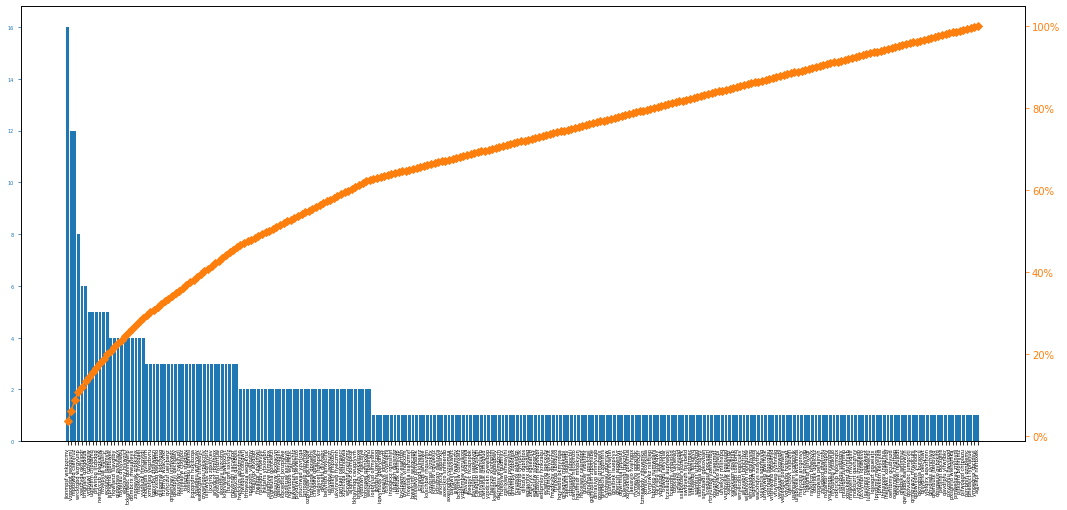

In [65]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=5)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Caller"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [67]:
caller_freq = a.groupby(a['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Assignment group"].cumsum()/caller_freq["Assignment group"].sum()*100).round(2)
caller_freq

,Assignment group,cumpercentage
Assignment group,,
GRP_24,165,36.59
GRP_0,106,60.09
GRP_33,66,74.72
GRP_42,28,80.93
GRP_12,25,86.47
GRP_25,17,90.24
GRP_34,11,92.68
GRP_28,7,94.24
GRP_10,4,95.12


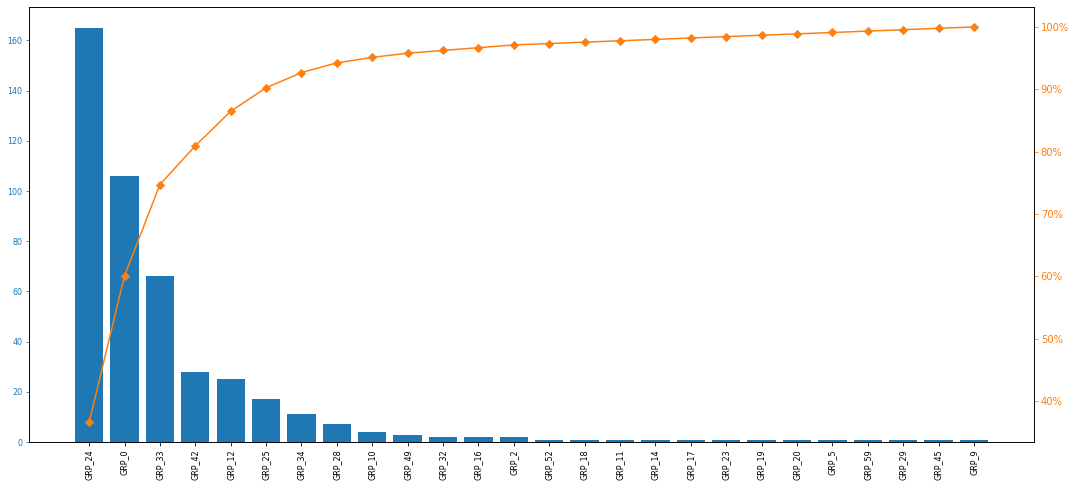

In [69]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=8)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [0]:
b = df[df['Final Category']== 'Special Char']

In [73]:
caller_freq = b.groupby(b['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
agyvbnwz mxsonkdc,3,5.66
kyagjxdh dmtjpbnz,3,11.32
xqyjztnm onfusvlz,2,15.09
hlrmufzx qcdzierm,2,18.87
zhpwcdea cboefuis,1,20.75
hbvwqine eakqyovu,1,22.64
kwpzbxvf cvuhoizx,1,24.53
ktghvuwr uwtakcmj,1,26.42
kclhqspo xvugztyc,1,28.30


In [74]:
caller_freq = b.groupby(b['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Assignment group"].cumsum()/caller_freq["Assignment group"].sum()*100).round(2)
caller_freq

,Assignment group,cumpercentage
Assignment group,,
GRP_30,21,39.62
GRP_31,16,69.81
GRP_48,15,98.11
GRP_12,1,100.00


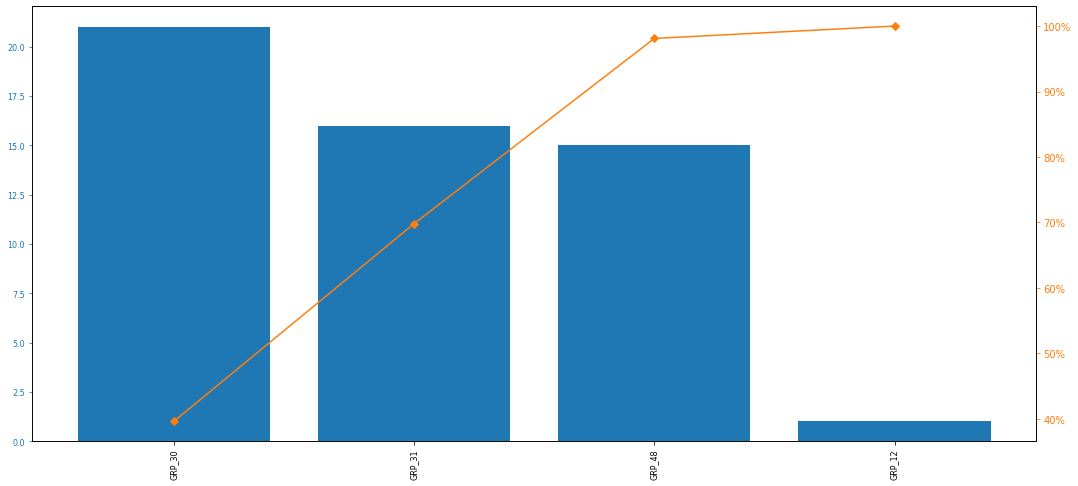

In [75]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=8)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [0]:
df['Description'] = df['Description'].astype(str)
df['Short description'] = df['Short description'].astype(str)
df['Caller'] = df['Caller'].astype(str)

In [0]:
df1 = df.copy(deep=True) # Removed non-englished row

In [0]:
df1.shape

(8500, 7)

In [0]:
df1.drop(df1[df1['Final Category'] == 'German'].index, inplace = True)
df1.drop(df1[df1['Final Category'] == 'Spanish'].index, inplace = True)
df1.drop(df1[df1['Final Category'] == 'Special Char'].index, inplace = True)
df1.shape

(7985, 7)

In [0]:
df1['Desc_word_count'] = df1['Description'].str.split().map(len)
df1['Short_desc_word_count'] = df1['Short description'].str.split().map(len)
df1.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category,Desc_word_count,Short_desc_word_count
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English,English,33,2
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English,English,25,1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English,English,11,5
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English,English,5,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English,2,2


In [0]:
df1['Desc_word_count'].describe()

count    7985.000000
mean       27.692048
std        66.401108
min         0.000000
25%         6.000000
50%        11.000000
75%        29.000000
max      1625.000000
Name: Desc_word_count, dtype: float64

In [0]:
df1['Short_desc_word_count'].describe()

count    7985.00000
mean        6.99712
std         4.15049
min         1.00000
25%         4.00000
50%         6.00000
75%         9.00000
max        28.00000
Name: Short_desc_word_count, dtype: float64

In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
stop_words = set(stopwords.words('english'))#stop words stored in 'a'

In [0]:
df1['Desc_no_stp_wrd'] = df1['Description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df1['Short_no_stp_wrd'] = df1['Short description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df1['Desc_no_dgt'] = df1['Description'].apply(lambda x: len([x for x in x if x.isdigit()]))
df1['Shrt_Desc_no_dgt'] = df1['Short description'].apply(lambda x: len([x for x in x if x.isdigit()]))

In [0]:
print(df1['Desc_word_count'].sum())
print(df1['Short_desc_word_count'].sum())

print(df1['Desc_no_dgt'].sum())
print(df1['Shrt_Desc_no_dgt'].sum())

print(df1['Desc_no_stp_wrd'].sum())
print(df1['Short_no_stp_wrd'].sum())


221121
55872
113542
27666
59971
13040


In [0]:
import re

In [0]:
df2 = df1.copy(deep = 'True') #Used for preprocessing of text

In [0]:
df2.drop(['Desc_word_count','Short_desc_word_count','Desc_no_stp_wrd','Short_no_stp_wrd','Desc_no_dgt','Shrt_Desc_no_dgt','Cat_Short_Description','Cat_Description','Final Category'],axis=1,inplace=True)

In [0]:
df2['Description'] = df2['Description'].astype(str)
df2['Short description'] = df2['Short description'].astype(str)
df2['Caller'] = df2['Caller'].astype(str)

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7985 entries, 0 to 8498
Data columns (total 4 columns):
Short description    7985 non-null object
Description          7985 non-null object
Caller               7985 non-null object
Assignment group     7985 non-null object
dtypes: object(4)
memory usage: 311.9+ KB


In [0]:
df2['Description'][7985]

'ess password reset'

In [0]:
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\W", ' ', x)) # Removed all punctuations or non word characters marks
#df1['Description'] = df1['Description'].apply(lambda x: x.lower()) #Converted to lower case
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r'\s+[a-z]\s+', ' ', x)) # Removed all single characters
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"^[a-z]\s+", ' ', x)) # Removed all single characters from start of the sentence
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]", ' ', x)) # Removed all the special characters
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s+", ' ', x))# Removed extra (one or more) spaces
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\d", '', x)) # Removed digits
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s+[a-zA-Z]\s+", '', x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"^\s", '', x)) # Removed all the space at starta and end of sentences
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s$", '', x)) ## Removed all the space at starta and end of sentences
#df1['Description'] = df1['Description'].apply(lambda x: re.sub("([^\x00-\x7F])+", '', x))

In [0]:
def preprocess(text):
    sentence     = str(text)
    sentence_low = sentence.lower()                                            #Converted to lower case
    rem_hyper    = sentence_low.replace('{html}',' ')                          #Remove hyperlink  
    rem_url      = re.sub(r'http:\S+', ' ',rem_hyper)                          #Remove Web link
    rem_mail     = re.sub(r"\S*@\S*.com\s?",' ',rem_url)                       #Remove mail Id
    txt_expand   = contractions.fix(rem_mail)                                  #Expand text
    rem_special  = re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]",' ',txt_expand) # Removed all the special characters 
    rem_num      = re.sub(r'\d', '', rem_special)                              #Remove digit
    rem_single   = re.sub(r"\s+[a-zA-Z]\s+", ' ',rem_num)                      #Remove single char
    rem_spa      = re.sub(r"\s+", ' ',rem_single)                              #Remove extra spaces
    clean_text   = rem_spa
    return clean_text

In [0]:
df2['Short description'][7]  #before pre-process

"ticket_no1550391- employment status - new non-employee [enter user's name]"

In [0]:
df2['Short description'] = df2['Short description'].map(lambda x:preprocess(x))
df2['Description'] = df2['Description'].map(lambda x:preprocess(x))

In [0]:
df2['Short description'][7]  #after process

'ticket no employment status new non employee [enter user name]'

In [0]:
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"that's","that is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"there's","there is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"what's","what is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"where's","where is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"it's","it is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"who's","who is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"i'm","i am",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"she's","she is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"he's","he is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"they're","they are",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"who're","who are", x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"ain't","am not", x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"wouldn't","would not",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"can't","can not",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"shouldn't","should not",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"couldn't","could not",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"won't","will not",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"isn't","is not",x))

In [0]:
df2.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name c...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hello team my meetings skype me...,hmjdrvpb komuaywn,GRP_0
2,can not log in to vpn,received from hi cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event critical hostname company com the value ...,event critical hostname company com the value ...,jyoqwxhz clhxsoqy,GRP_1
7,ticket no employment status new non employee [...,ticket no employment status new non employee [...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant,ticket update on inplant,fumkcsji sarmtlhy,GRP_0


In [0]:
  df2['Description'][1]

' received from hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind '

In [0]:
df1['Description'][1]

'\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

In [0]:
df2.describe()

,Short description,Description,Caller,Assignment group
count,7985,7985,7985,7985
unique,5922,6243,2772,74
top,job job failed in job scheduler at,received from job job failed in job scheduler at,bpctwhsn kzqsbmtp,GRP_0
freq,469,462,810,3869


In [0]:
#!pip install langdetect
#from langdetect import detect
#df1['lang'] = " "
#store = []
#for i in range(8500):
#  try:
#    desc = df1['Description'][i]
#    temp = detect(desc)
#    store.append(temp)
#  except:
#    language = "error"
#    print("This row throws and error:", df1['Description'][i])
  #print(temp)

In [0]:
#store1 = pd.DataFrame(store)
#store1['lang'] = store1
#store1.head(5)

,0,lang
0,en,en
1,en,en
2,en,en
3,en,en
4,no,no


In [0]:
#df1['Description'][4]

'skype error '

In [0]:
#store1.groupby(store1['lang'])['lang'].count().sort_values(ascending=False)

lang
en    6988
de     389
af     274
it     132
fr     109
vi     106
no      68
es      61
nl      58
sv      57
ca      52
da      41
pt      39
pl      31
ro      17
tl      15
cy      13
sl       8
sq       8
fi       6
et       6
hr       5
id       4
so       3
cs       2
lt       2
sk       1
sw       1
lv       1
Name: lang, dtype: int64

In [0]:
df3 = df2.copy(deep=True) # Takenized applied 

In [0]:
df3.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name c...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hello team my meetings skype me...,hmjdrvpb komuaywn,GRP_0
2,can not log in to vpn,received from hi cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
#df2.drop(['Desc_word_count','Short_desc_word_count'],axis=1,inplace=True)

In [0]:
df3['Description'] = df3['Description'].astype(str)
df3['Short description'] = df3['Short description'].astype(str)
df3['Caller'] = df3['Caller'].astype(str)

In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
stop_words = set(stopwords.words('english'))#stop words stored in 'a'

In [0]:
from nltk.tokenize import word_tokenize
df3['Description'] = [word_tokenize(i) for i in df3['Description']]
df3['Short description'] = [word_tokenize(i) for i in df3['Short description']]

In [0]:
df3.head()

,Short description,Description,Caller,Assignment group
0,"[login, issue]","[verified, user, details, employee, manager, n...",spxjnwir pjlcoqds,GRP_0
1,[outlook],"[received, from, hello, team, my, meetings, sk...",hmjdrvpb komuaywn,GRP_0
2,"[can, not, log, in, to, vpn]","[received, from, hi, can, not, log, on, to, vp...",eylqgodm ybqkwiam,GRP_0
3,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]",xbkucsvz gcpydteq,GRP_0
4,"[skype, error]","[skype, error]",owlgqjme qhcozdfx,GRP_0


In [0]:
df3['Description']= df3['Description'].apply(lambda x: [item for item in x if item not in stop_words])
df3['Short description']= df3['Short description'].apply(lambda x: [item for item in x if item not in stop_words])  

In [0]:
df3.head()

,Short description,Description,Caller,Assignment group
0,"[login, issue]","[verified, user, details, employee, manager, n...",spxjnwir pjlcoqds,GRP_0
1,[outlook],"[received, hello, team, meetings, skype, meeti...",hmjdrvpb komuaywn,GRP_0
2,"[log, vpn]","[received, hi, log, vpn, best]",eylqgodm ybqkwiam,GRP_0
3,"[unable, access, hr, tool, page]","[unable, access, hr, tool, page]",xbkucsvz gcpydteq,GRP_0
4,"[skype, error]","[skype, error]",owlgqjme qhcozdfx,GRP_0


In [0]:
df3['Desc_word_count'] = df3['Description'].str.split().map(len)
df3['Short_desc_word_count'] = df3['Short description'].str.split().map(len)
print(df3.describe())
print(np.percentile(df3['Desc_word_count'],90))
print(np.percentile(df3['Desc_word_count'],95))

       Desc_word_count  Short_desc_word_count
count      7985.000000            7985.000000
mean         18.384346               5.206137
std          46.787108               2.774795
min           1.000000               1.000000
25%           5.000000               3.000000
50%           8.000000               5.000000
75%          19.000000               7.000000
max        1136.000000              25.000000
36.0
59.0


In [0]:
df3['Desc_no_stp_wrd'] = df3['Description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df3['Short_no_stp_wrd'] = df3['Short description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df3['Desc_no_dgt'] = df3['Description'].apply(lambda x: len([x for x in x if x.isdigit()]))
df3['Shrt_Desc_no_dgt'] = df3['Short description'].apply(lambda x: len([x for x in x if x.isdigit()]))

In [0]:
print(df3['Desc_word_count'].sum())
print(df3['Short_desc_word_count'].sum())

print(df3['Desc_no_dgt'].sum())
print(df3['Shrt_Desc_no_dgt'].sum()) # To be discussed with team

print(df3['Desc_no_stp_wrd'].sum())
print(df3['Short_no_stp_wrd'].sum())

146799
41571
8852
1732
0
0


In [0]:
df3.head()

,Short description,Description,Caller,Assignment group,Desc_word_count,Short_desc_word_count,Desc_no_stp_wrd,Short_no_stp_wrd,Desc_no_dgt,Shrt_Desc_no_dgt
0,"['login', 'issue']","['verified', 'user', 'details', 'employee', 'm...",spxjnwir pjlcoqds,GRP_0,22,2,0,0,0,0
1,['outlook'],"['received', 'hello', 'team', 'meetings', 'sky...",hmjdrvpb komuaywn,GRP_0,15,1,0,0,0,0
2,"['log', 'vpn']","['received', 'hi', 'log', 'vpn', 'best']",eylqgodm ybqkwiam,GRP_0,5,2,0,0,0,0
3,"['unable', 'access', 'hr', 'tool', 'page']","['unable', 'access', 'hr', 'tool', 'page']",xbkucsvz gcpydteq,GRP_0,5,5,0,0,0,0
4,"['skype', 'error']","['skype', 'error']",owlgqjme qhcozdfx,GRP_0,2,2,0,0,0,0


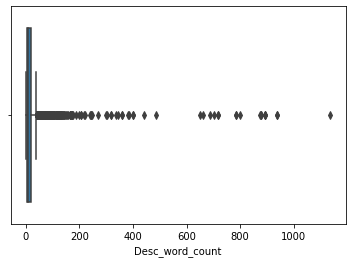

In [0]:
sns.boxplot(df3['Desc_word_count'])

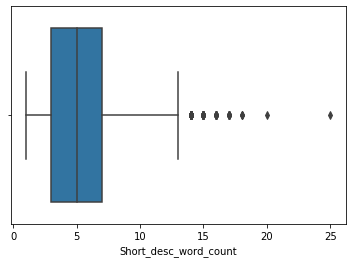

In [0]:
sns.boxplot(df3['Short_desc_word_count'])

In [0]:
df4 = df3.copy(deep=True)
df5 = df3.copy(deep=True)

In [0]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7985 entries, 0 to 8498
Data columns (total 10 columns):
Short description        7985 non-null object
Description              7985 non-null object
Caller                   7985 non-null object
Assignment group         7985 non-null object
Desc_word_count          7985 non-null int64
Short_desc_word_count    7985 non-null int64
Desc_no_stp_wrd          7985 non-null int64
Short_no_stp_wrd         7985 non-null int64
Desc_no_dgt              7985 non-null int64
Shrt_Desc_no_dgt         7985 non-null int64
dtypes: int64(6), object(4)
memory usage: 686.2+ KB


In [0]:
df4.drop(['Desc_word_count','Short_desc_word_count','Short description','Caller','Desc_no_stp_wrd','Short_no_stp_wrd','Desc_no_dgt','Shrt_Desc_no_dgt'],axis=1,inplace=True)
df5.drop(['Desc_word_count','Description','Short_desc_word_count','Caller','Desc_no_stp_wrd','Short_no_stp_wrd','Desc_no_dgt','Shrt_Desc_no_dgt'],axis=1,inplace=True)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer()
x = cv.fit_transform(df4['Description'])
y = df4['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
y_pred = model.predict(x_test)

0.7014715090795242
0.641202254226675


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.68      0.98      0.80       823
       GRP_1       0.00      0.00      0.00         5
      GRP_10       1.00      0.13      0.23        23
      GRP_11       0.00      0.00      0.00         7
      GRP_12       0.50      0.52      0.51        33
      GRP_13       0.40      0.47      0.43        30
      GRP_14       0.38      0.18      0.24        17
      GRP_15       0.00      0.00      0.00        12
      GRP_16       0.00      0.00      0.00        14
      GRP_17       0.00      0.00      0.00        20
      GRP_18       0.14      0.04      0.07        23
      GRP_19       0.43      0.07      0.12        45
       GRP_2       0.57      0.27      0.37        59
      GRP_20       0.00      0.00      0.00        12
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.00      0.00      0.00         9
      GRP_23       0.00      0.00      0.00         7
      GRP_24       0.78    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
cv = CountVectorizer()
x1 = cv.fit_transform(df5['Short description'])
y1 = df5['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x1_train, y1_train)
print(model.score(x1_train,y1_train))
print(model.score(x1_test,y1_test))
y_pred = model.predict(x1_test)

0.7055416405760802
0.6537257357545397


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.70      0.97      0.81       823
       GRP_1       0.00      0.00      0.00         5
      GRP_10       1.00      0.04      0.08        23
      GRP_11       0.00      0.00      0.00         7
      GRP_12       0.45      0.52      0.48        33
      GRP_13       0.54      0.43      0.48        30
      GRP_14       0.38      0.18      0.24        17
      GRP_15       1.00      0.08      0.15        12
      GRP_16       0.00      0.00      0.00        14
      GRP_17       0.95      1.00      0.98        20
      GRP_18       0.00      0.00      0.00        23
      GRP_19       0.44      0.09      0.15        45
       GRP_2       0.50      0.22      0.31        59
      GRP_20       1.00      0.08      0.15        12
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.00      0.00      0.00         9
      GRP_23       0.00      0.00      0.00         7
      GRP_24       0.79    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
MAX_NB_WORDS = 20000

Encoding the data using Tokenizer

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS,split=' ')
Description_df = df2['Description']
tokenizer.fit_on_texts(Description_df)

Using TensorFlow backend.


Removing Stopwords from Description column

In [0]:
Description = []
for sentence in Description_df:
  word_tokens = word_tokenize(sentence)
  filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  filtered_sentence = []
  for w in word_tokens:
      if w not in stop_words:
        filtered_sentence.append(w)
  Description.append(filtered_sentence)

In [0]:
print(Description[0])

['verified', 'user', 'details', 'employee', 'manager', 'name', 'checked', 'user', 'name', 'ad', 'reset', 'password', 'advised', 'user', 'login', 'check', 'caller', 'confirmed', 'able', 'login', 'issue', 'resolved']


In [0]:
len(Description[0])

22

Getting the maximun word count present in Description Column

In [0]:
MAX_SENT_LENGTH=0
for desc in Description:
  if MAX_SENT_LENGTH < len(desc):
    MAX_SENT_LENGTH = len(desc)
print(MAX_SENT_LENGTH)      

1136


Creating Data array to hold word index values

In [0]:
import numpy as np
data = np.zeros((len(Description),25))
data.shape

(7985, 25)

In [0]:
data=data.astype('int32')

Replacing dummy array with word index values for each Description

In [0]:
from keras.preprocessing.text import text_to_word_sequence
x=0
for description in Description:
  tkn = tokenizer.texts_to_sequences(description)#converting text to sequence
  if(len(tkn)>0):
    token_indexed = np.concatenate(tkn,axis=0).tolist()#converting array of array to single array
    token_indexed = np.pad(token_indexed,(0,25))#appending max word count for each description
    token_indexed = token_indexed[0:25]#get the first 822 values from each token
    data[x]= token_indexed
    x=x+1

In [0]:
print(data[0])

[202  21 210 259 114  46 367  21  46 277  34  20 508  21  62 104 358 296
  90  62  35 280   0   0   0]


Convert labels into one-hot vectors

In [0]:
assignment_group = pd.DataFrame(df2['Assignment group'])
group = pd.get_dummies(assignment_group,columns=['Assignment group'])

In [0]:
group.head()

,Assignment group_GRP_0,Assignment group_GRP_1,Assignment group_GRP_10,Assignment group_GRP_11,Assignment group_GRP_12,Assignment group_GRP_13,Assignment group_GRP_14,Assignment group_GRP_15,Assignment group_GRP_16,Assignment group_GRP_17,Assignment group_GRP_18,Assignment group_GRP_19,Assignment group_GRP_2,Assignment group_GRP_20,Assignment group_GRP_21,Assignment group_GRP_22,Assignment group_GRP_23,Assignment group_GRP_24,Assignment group_GRP_25,Assignment group_GRP_26,Assignment group_GRP_27,Assignment group_GRP_28,Assignment group_GRP_29,Assignment group_GRP_3,Assignment group_GRP_30,Assignment group_GRP_31,Assignment group_GRP_32,Assignment group_GRP_33,Assignment group_GRP_34,Assignment group_GRP_35,Assignment group_GRP_36,Assignment group_GRP_37,Assignment group_GRP_38,Assignment group_GRP_39,Assignment group_GRP_4,Assignment group_GRP_40,Assignment group_GRP_41,Assignment group_GRP_42,Assignment group_GRP_43,Assignment group_GRP_44,Assignment group_GRP_45,Assignment group_GRP_46,Assignment group_GRP_47,Assignment group_GRP_48,Assignment group_GRP_49,Assignment group_GRP_5,Assignment group_GRP_50,Assignment group_GRP_51,Assignment group_GRP_52,Assignment group_GRP_53,Assignment group_GRP_54,Assignment group_GRP_55,Assignment group_GRP_56,Assignment group_GRP_57,Assignment group_GRP_58,Assignment group_GRP_59,Assignment group_GRP_6,Assignment group_GRP_60,Assignment group_GRP_61,Assignment group_GRP_62,Assignment group_GRP_63,Assignment group_GRP_64,Assignment group_GRP_65,Assignment group_GRP_66,Assignment group_GRP_67,Assignment group_GRP_68,Assignment group_GRP_69,Assignment group_GRP_7,Assignment group_GRP_70,Assignment group_GRP_71,Assignment group_GRP_72,Assignment group_GRP_73,Assignment group_GRP_8,Assignment group_GRP_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
labels = np.array(group)
print(labels[0])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Check the shape of data and label arrays

In [0]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (7985, 25)
Shape of label tensor: (7985, 74)


Shuffling the data & labels

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Creating training and testing set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(data,labels, test_size = 0.20, random_state = 42)

In [0]:
X_train[0]

array([   9,    7,   24, 1144,   33,    7,   30,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(6388, 25)
(6388, 74)
(1597, 25)
(1597, 74)


In [0]:
X_train[0]

array([   9,    7,   24, 1144,   33,    7,   30,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [0]:
from keras.datasets import imdb
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

In [0]:
from keras.layers import Bidirectional
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=25))
model.add(Bidirectional(LSTM(130)))
model.add(Dense(74, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=3, batch_size=64)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 32)            640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 260)               169520    
_________________________________________________________________
dense_1 (Dense)              (None, 74)                19314     
Total params: 828,834
Trainable params: 828,834
Non-trainable params: 0
_________________________________________________________________
None



Train on 6388 samples, validate on 1597 samples
Epoch 1/3





6388/6388 [==============================] - 14s 2ms/step - loss: 0.0495 - acc: 0.9862 - val_loss: 0.0440 - val_acc: 0.9865
Epoch 2/3
6388/6388 [==============================] - 12s 2ms/step - loss: 0.0450 -

In [0]:
y_pred = model.predict(X_val)

In [0]:
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [0]:
from sklearn.metrics import classification_report
print(classification_report(Y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.53      0.70      0.61       800
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        41
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         4
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
